# Module 1.2 - chemical equilibrium

This example demonstrates calculation of the adiabatic flame temperature for a methane/air mixture, comparing calculations which assume either a one-step or detailed chemistry chemical equilibrium. This example is similar to the example on the cantera website:
https://cantera.org/examples/jupyter/thermo/flame_temperature.ipynb.html

In [1]:
# use notebook for jupyter notebook
#%matplotlib notebook
# use inline for jupyter labs
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

## One step combustion

The one-step reaction equation for combustion of a lean methane/air mixture $(\phi<1)$ is:

$$\phi CH_4+2(O_2+3.76N_2) \rightarrow \phi CO_2+2\phi H_2O+2(1-\phi)O_2+7.52N_2\phi CH_4 + 2(O_2 + 3.76 N_2)$$

For a rich mixture $(\phi>1)$, this becomes:

$$\phi CH_4 + 2(O_2+3.76N_2) \rightarrow CO_2+2H_2O+(\phi-1)CH_4 + 7.52N_2 $$

To find the flame temperature resulting from these reactions using Cantera, we create a gas object from a detailed reaction mechanism, containing only the species in the above equations, and then use the equilibrate() function to find the resulting mixture composition and temperature, taking advantage of the fact that equilibrium will strongly favor conversion of the fuel molecule.

In [2]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species in the one-step reaction equation for combustion
complete_species = [species[S] for S in ('CH4','O2','N2','CO2','H2O')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

# create an array for equivalence ratio from 0.5 - 2.0 with 100 points
phi = np.linspace(0.5, 2.0, 100)
T_1step = np.zeros(phi.shape)
for i in range(len(phi)):
    # set the temperature and pressure
    gas1.TP = 300, ct.one_atm
    # set the equivalence ratio for a fuel-air mixture 
    # with air=Oxygen+Nitrogen in the mole fraction ratio given below
    gas1.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    # equilibrium computation, with specific enthalpy H and pressure P being constant
    gas1.equilibrate('HP')
    # store temperature in the list
    T_1step[i] = gas1.T    

## Detailed chemistry combustion

In the case of detailed chemistry combustion, the resulting mixture composition is not known in advance, but must be found by calculating the equilibrium composition at constant enthalpy and temperature:

$$\phi CH_4 + 2(O_2 + 3.76 N_2) \rightarrow ? CO_2 + ? CO + ? H_2 + ? H_2O + ? O_2 + 7.52 N_2 + minor\ species$$

Now, we use a gas phase object containing all 53 species defined in the GRI 3.0 mechanism, and compute the equilibrium composition as a function of equivalence ratio.


In [3]:
# Create an IdealGas object including detailed chemistry combustion species
gas2 = ct.Solution(thermo='IdealGas', species=species.values())
T_DC = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    T_DC[i] = gas2.T

Let's plot the resulting temperatures as a function of equivalence ratio

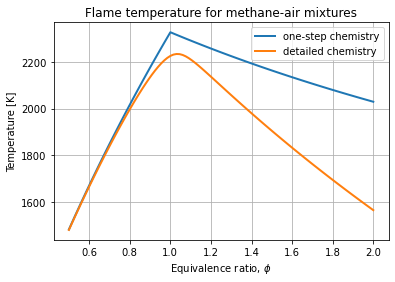

In [4]:
plt.plot(phi, T_1step, label='one-step chemistry', lw=2)
plt.plot(phi, T_DC, label='detailed chemistry', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]');
plt.title('Flame temperature for methane-air mixtures')
plt.legend()
plt.show()

# Assignment 1.2:

- Construct the $T(\phi)$ graph for one-step and detailed chemistry combustion for a hydrogen-air mixture. You can use the same reaction mechanism. Give the one-step reaction for hydrogen and air. For the scientific description: what is the range of validity of the one-step method for this case (give exact numbers and motivate)? Comment on the difference between hydrogen and methane. **[3 pts]**
- Construct the $T(\phi)$ graph for methane-air and hydrogen-air for one step and detailed chemistry at a pressure of P=10 bar. Show the comparison in a single figure. Comment on the effect of pressure and the effect of chemistry model. **[3 pts]**
- Plot the species mole fractions of $CO, CO_2, H_2, H_2O$ as a function of equivalence ratio $\phi$ for methane-air at P=1 and P=10. Use *subfigure* or *subplot* to place all 4 figures next to each other. Comment on the effect of pressure on the species formation and on what would happen if we switch to a one-step chemistry model. **[3 pts]**

As always, give a scientific description of your figures, explain what we see and why. 